You can perform PID on MI(r;(x,v)), and compare the result of different 'x'.<br>
'x' can from experimental data or produce in this code for different Tau (Gramma) or cutoff frequency.<br>
'r' can be real responses of RGC or from NGD or from x+$\Delta$*v.<br>
Using 20200408 Chou's data, unit2.<br>

# Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.ticker import MaxNLocator
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

In [2]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState
from Spike_Generation import Spike_Time_Generater
from Spike_Generation import NL
from StimulusnResponse import expSnR
from SpatialTemporal_Correlation_and_Convolution import ST_STA

importing Jupyter notebook from time_shifted_PID.ipynb
importing Jupyter notebook from J_broja_PID.ipynb
importing Jupyter notebook from Spike_Generation.ipynb
importing Jupyter notebook from StimulusnResponse.ipynb
importing Jupyter notebook from SpatialTemporal_Correlation_and_Convolution.ipynb


# Load Experimental data

## select files and channels

In [3]:
annots = loadmat('D:\\GoogleDrive\\retina\\Exps\\2020\\0729\\merge\\merge_0224_Checkerboard_30Hz_27_15min_Br50_Q100.mat')
dt = 1/60

In [4]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Video', 'TimeStamps', 'BinningInterval', 'diode_BT', 'bin_pos', 'reconstruct_spikes'])

In [5]:
x = np.array([checkerboard for checkerboard in annots['bin_pos'][:,0]])
rstate = np.zeros((60, x.shape[0]))
TimeStamps =np.round(np.squeeze(annots['TimeStamps']))
T=np.arange(len(x))*dt
for cn in range(60):
    rstate[cn,:], _ = np.histogram(annots['reconstruct_spikes'][0][cn]-TimeStamps[0], np.append(T,T[-1]+dt))

In [44]:
channelnumbers = [52]
for cn in channelnumbers:
    STK, (time_axis, space_axis) = ST_STA(x,rstate[cn,:],np.arange(-9,0,1),1,dt,c = 0)

IndexError: tuple index out of range

In [42]:
# rstate[cn,:].shape[0]

54017

In [9]:
r = rstate[52-1,:]
tstep = np.arange(-9,0,1)

dx = 1
STkernel = np.zeros([len(tstep),x.shape[1], x.shape[2]])
Denominator = np.zeros(len(tstep))
time_axis = tstep*dt
# space_axis = np.arange(max(x.shape[1], y.shape[1]))*dx
# space_axis = space_axis-np.mean(space_axis)
for i in range(len(tstep)):
    for ii in np.arange(max(-tstep[i],0), len(r)-1+min(-tstep[i], 0)):
        STkernel[i,:,:] += r[ii]*x[tstep[i]+ii]*dx*dt
        Denominator[i] += r[ii]*dx*dt
STkernel = STkernel/Denominator[:, np.newaxis, np.newaxis]
# return STkernel/Denominator, (time_axis, space_axis)

ValueError: operands could not be broadcast together with shapes (9,27,27) (9,) 

In [10]:
STkernel = STkernel/Denominator[:, np.newaxis, np.newaxis]

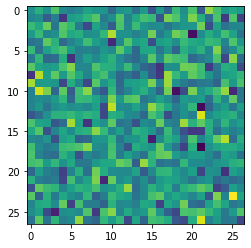

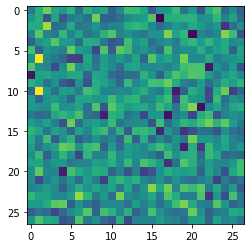

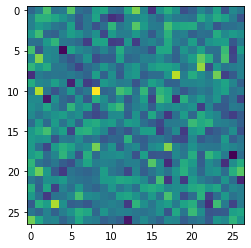

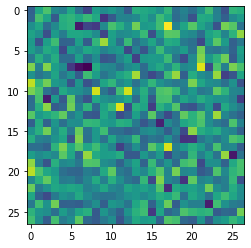

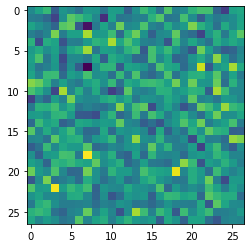

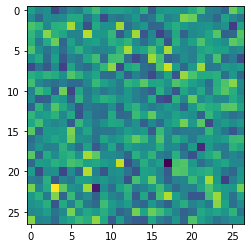

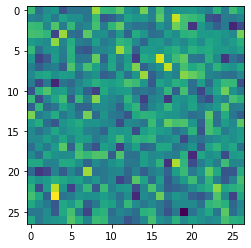

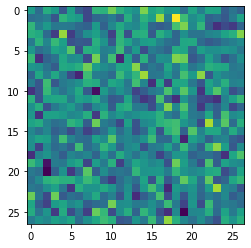

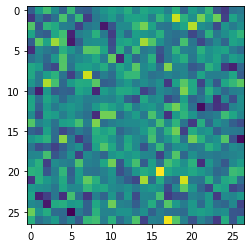

In [11]:
for SK in STkernel:
    plt.imshow(SK)
    plt.show()

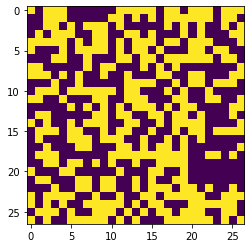

In [13]:
 plt.imshow(x[tstep[i]+ii])